In [2]:
# common imports
from qiskit import *
import matplotlib as mpl
%matplotlib inline

In [3]:
# setup
q_register = QuantumRegister(2)
classical_register = ClassicalRegister(2)
q_circuit = QuantumCircuit(q_register, classical_register)

In [4]:
# draw circuit
q_circuit.draw()

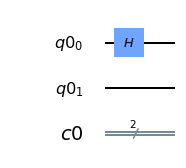

In [6]:
# hadamard gate 
q_circuit.h(q_register[0])
q_circuit.draw(output='mpl')

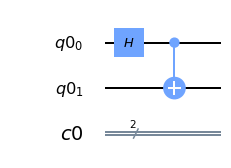

In [7]:
# controlled not
q_circuit.cx(q_register[0],q_register[1])
q_circuit.draw(output='mpl')

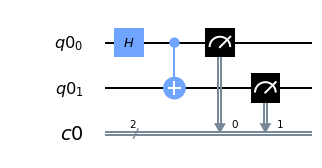

In [8]:
# add measurements
q_circuit.measure(q_register, classical_register)
q_circuit.draw(output='mpl')

In [9]:
# simulate on classical device
simulator = Aer.get_backend('qasm_simulator')
result = execute(q_circuit, backend=simulator).result()

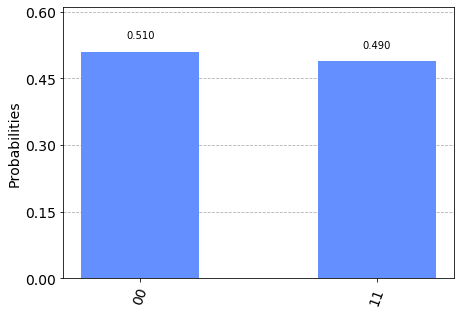

In [10]:
# visualize reults
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(q_circuit))

In [12]:
# run on ibm q machine
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
q_comp = provider.get_backend('ibmq_16_melbourne')
job = execute(q_circuit, backend=q_comp)

Credentials are already in use. The existing account in the session will be replaced.


In [14]:
# submit to the queue
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


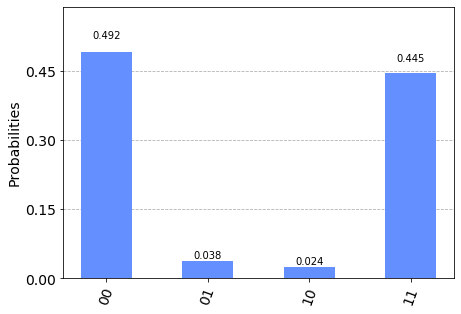

In [15]:
# view results from quantum run
q_result = job.result()
plot_histogram(q_result.get_counts(q_circuit))